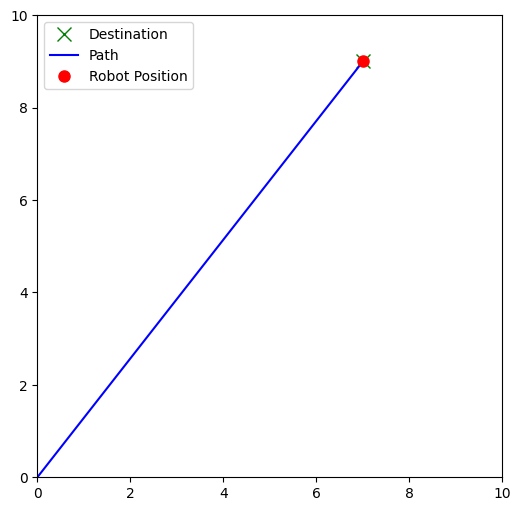

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Warehouse dimensions and robot specifications
warehouse_width = 10
warehouse_height = 10
robot_speed = 4 # Increased speed for faster movement
update_interval = 0.1  # Time interval for plot updates

# Starting and ending positions
start_position = (0, 0)
end_position = (7, 9)

# Calculate the next position of the robot
def move_robot(current_position, target_position):
    x1, y1 = current_position
    x2, y2 = target_position
    distance = np.hypot(x2 - x1, y2 - y1)

    # If robot is at target, return the current position
    if distance == 0:
        return current_position

    # Move step distance towards the target
    step_distance = min(robot_speed, distance)
    direction = ((x2 - x1) / distance, (y2 - y1) / distance)
    new_position = (x1 + direction[0] * step_distance, y1 + direction[1] * step_distance)
    return new_position

# Initialize robot position and path
robot_position = start_position
path = [start_position]

# Set up plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, warehouse_width)
ax.set_ylim(0, warehouse_height)
ax.plot(end_position[0], end_position[1], 'gx', markersize=10, label="Destination")  # Mark destination
path_line, = ax.plot([], [], 'b-', label="Path")
robot_marker, = ax.plot([], [], 'ro', markersize=8, label="Robot Position")
plt.legend()

# Simulation loop
while robot_position != end_position:
    # Move robot towards the destination
    robot_position = move_robot(robot_position, end_position)
    path.append(robot_position)

    # Update plot every few steps
    if len(path) % 5 == 0:  # Update every 5 steps to optimize rendering
        path_line.set_data(*zip(*path))
        robot_marker.set_data([robot_position[0]], [robot_position[1]])  # Wrap in lists to avoid warning
        plt.pause(update_interval)

# Final plot update
path_line.set_data(*zip(*path))
robot_marker.set_data([robot_position[0]], [robot_position[1]])  # Wrap in lists to avoid warning
plt.show()
